# Six Views of a Point Charge  

One of the challenges of electrodynamics is developing an intuition for potentials and fields.  What is a field?  What does it *look* like?

We can answer the first question with a formal definition.  A ***field*** is a mathematical object that assigns a quantity to every point in space.  If the quantity is just a number, we call the object a ***scalar field***.  If the quantity is a vector, we call the object a ***vector field***.

It is hard to say what a field "looks like".  What does temperature look like?  What does gravity look like?  Even if we can't see the quantity in question, we have many ways to represent it.  This problem will introduce you to some useful Python functions as we explore the potentials and electric fields of electric charges.

## Point Charge

The electrostatic potential of a point charge is
$$V(\vec{r}) = \dfrac{kq}{r}$$

The electric field of a point charge is
$$\vec{E}(\vec{r}) = \dfrac{kq}{r^2} \hat{r}$$

The following Python ***functions*** will compute the potential and electric field of a point charge.

In [1]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Define functions to calculate fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6): 
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

In [3]:
X, Y, Z = coordinates()
V = potential()
Ex, Ey, Ez = field()

Now that we have a scalar field and a vector field, let's look at them!

### 1. 1D Slices of Potential

The following code will plot the potential along three lines through a point you specify: one line parallel to the x-axis, one parallel to the y-axis, and one parallel to the z-axis.

The slices are taken through (x0,y0,z0) = (2.5, 2.5, 2.5).


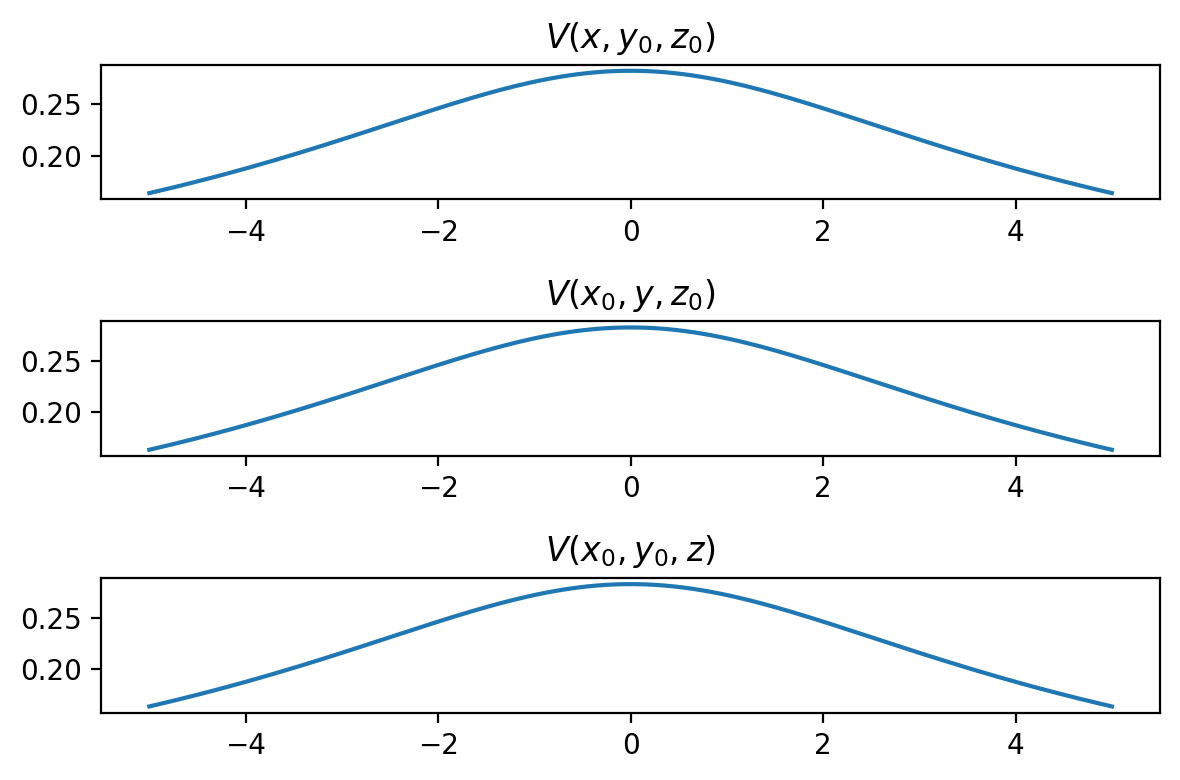

In [4]:
# Choose coordinate indices for slices.
x0 = 150
y0 = 150
z0 = 150

x_val = X[x0,y0,z0]
y_val = Y[x0,y0,z0]
z_val = Z[x0,y0,z0]

print("The slices are taken through (x0,y0,z0) = (%g, %g, %g)." % (x_val, y_val, z_val))

# Create a figure and plot the slices.
fig, ax = plt.subplots(3, dpi=200)

# Plot V(x,y0,z0)
x = X[:,y0,z0]
v1 = V[:,y0,z0]
ax[0].plot(x,v1)
ax[0].set_title(r"$V(x,y_0,z_0)$")

# Plot V(x0,y,z0)
y = Y[x0,:,z0]
v2 = V[x0,:,z0]
ax[1].plot(y,v2)
ax[1].set_title(r"$V(x_0,y,z_0)$")

# Plot V(x0,y0,z)
z = Z[x0,y0,:]
v3 = V[x0,y0,:]
ax[2].plot(z,v3)
ax[2].set_title(r"$V(x_0,y_0,z)$")


fig.tight_layout()

Change the values of `x0`, `y0`, and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the potential reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

Viewing the potential in this manner provides the strength of the potential at the chosen coordinates with respect to the charge located at (0,0,0). 

It provides a simple scalar representation of the potential, missing relevant information such as direction.
This shows the potential is symmetrical from all sides, meaning the same strength at equal distances on all sides. 

It is limited because it only shows the strength, and doesent represent direction or charge. 


### 2. 2D Slices of Potential

The cell below will plot a 2D slice of the potential through a height that you specify.

It will display a surface plot and a heatmap. 

The slice is taken through z0 = 5.


(-5.0, 5.0, -5.0, 5.0)

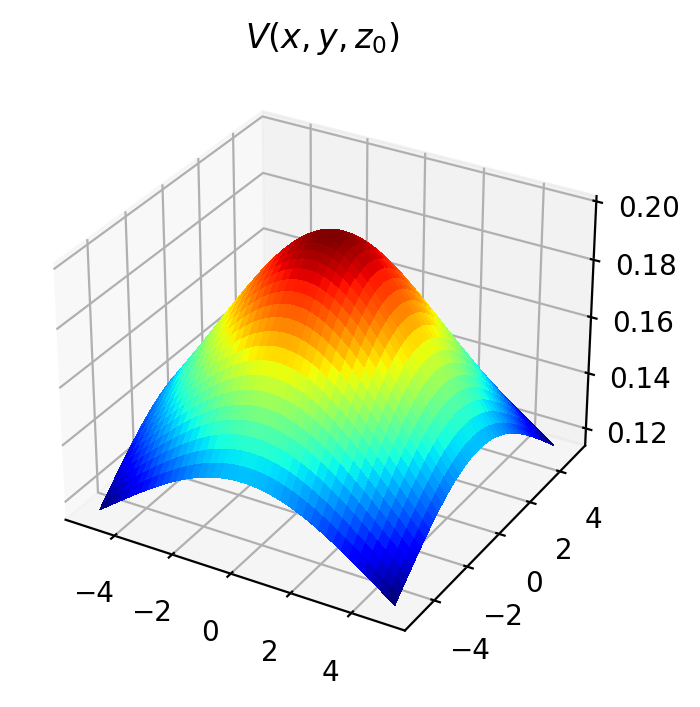

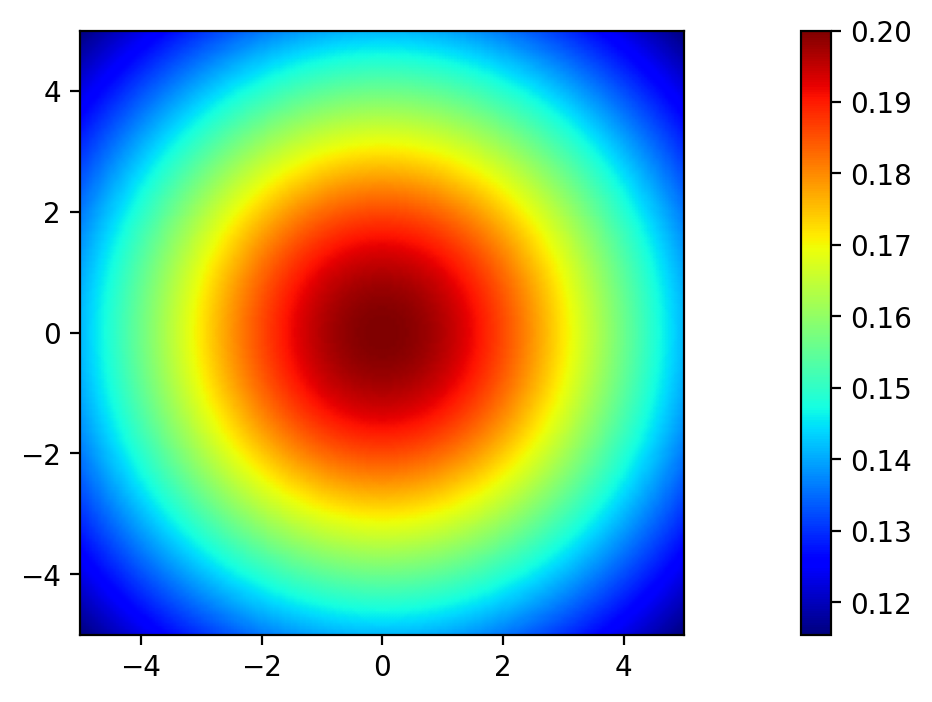

In [5]:
# Choose z-coordinate index for slices.
z0 = 200
z_val = Z[x0,y0,z0]

print("The slice is taken through z0 = %g." % z_val)

# Get slice
x = X[:,:,z0]
y = Y[:,:,z0]
v = V[:,:,z0]

# Create a surface plot.
fig = plt.figure(dpi=200)
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(x,y,v, cmap='jet', antialiased=False, linewidth=0)
ax1.set_title(r"$V(x,y,z_0)$")

# Heatmap
fig, ax2 = plt.subplots(dpi=200)
image = ax2.pcolormesh(x,y,v, shading='gouraud', cmap='jet')
plt.colorbar(image, use_gridspec=True)
ax2.axis('scaled')

Change the value of `z0` in the cell above and run it again.  Do this several times.

What does this representation of the potential reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This representation gives us the strength of the field in a 2 dimensional space at a distance above the charge.
As the slice height is raised, the strength is lessened, and it is represented by having a less sharp peak in a more spread out form. 
This is able to show the potential at any single height, however, it is limited because it cant represent more than just the strength in a single axis. 

### 3. 1D Slices of Electric Field

The following code will plot the components of the electric field along three lines through a point you specify: one line parallel to the x-axis, one parallel to the y-axis, and one parallel to the z-axis.

The slices are taken through (x0,y0,z0) = (2.5, 0, 2.5).


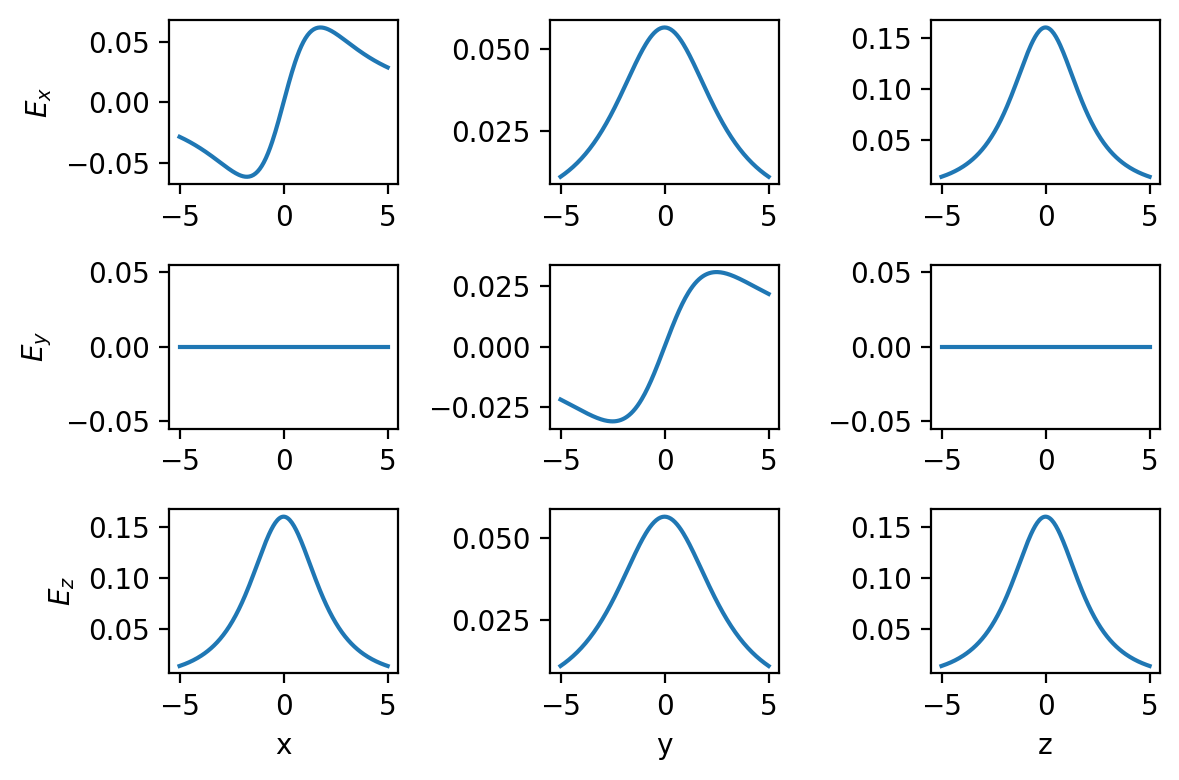

In [6]:
# Choose coordinate indices for slices.
x0 = 150
y0 = 100
z0 = 150

x_val = X[x0,y0,z0]
y_val = Y[x0,y0,z0]
z_val = Z[x0,y0,z0]

print("The slices are taken through (x0,y0,z0) = (%g, %g, %g)." % (x_val, y_val, z_val))

# Create a figure and plot the slices.
fig, ax = plt.subplots(3,3, dpi=200)

# Plot components of E(x,y0,z0)
x = X[:,y0,z0]
y = Y[x0,:,z0]
z = Z[x0,y0,:]


Ex1 = Ex[:,y0,z0]
ax[0,0].plot(x,Ex1)
ax[0,0].set_ylabel(r"$E_x$")

Ey1 = Ey[:,y0,z0]
ax[1,0].plot(x,Ey1)
ax[1,0].set_ylabel(r"$E_y$")

Ez1 = Ez[:,y0,z0]
ax[2,0].plot(x,Ez1)
ax[2,0].set_ylabel(r"$E_z$")
ax[2,0].set_xlabel('x')


Ex2 = Ex[x0,:,z0]
ax[0,1].plot(y,Ex2)

Ey2 = Ey[x0,:,z0]
ax[1,1].plot(y,Ey2)

Ez2 = Ez[x0,:,z0]
ax[2,1].plot(y,Ez2)
ax[2,1].set_xlabel('y')


Ex3 = Ex[x0,y0,:]
ax[0,2].plot(z,Ex3)

Ey3 = Ey[x0,y0,:]
ax[1,2].plot(z,Ey3)

Ez3 = Ez[:,y0,z0]
ax[2,2].plot(z,Ez3)
ax[2,2].set_xlabel('z')

fig.tight_layout()

Change the values of `x0`, `y0`, and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This reveals there is more to the field than simple a scalar quantity. These graphs appear to show both potential strength and polarity?. From both the X and Y directions there is a visible positive and negative. This is absent from the Z axis, as its viewing strength from above. This is still a limited representation as it is a single slice at a certain distance. 

### 4. 2D Slices of Electric Field

The cell below will plot a 2D slice of the components of the electric field through a height that you specify.

It will display a surface plot and a heatmap of each component. 

The slice is taken through z0 = 1.


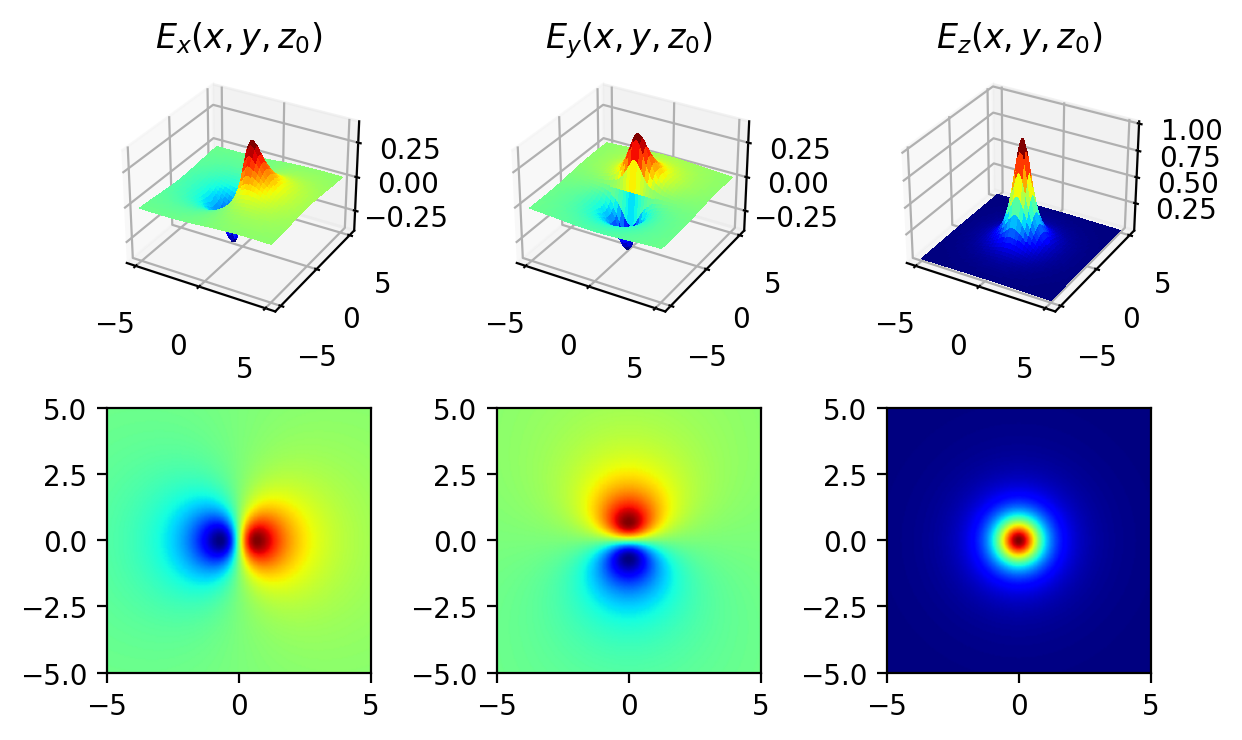

In [7]:
# Choose z-coordinate index for slices.
z0 = 120
z_val = Z[x0,y0,z0]

print("The slice is taken through z0 = %g." % z_val)

# Get slices
x = X[:,:,z0]
y = Y[:,:,z0]
ex = Ex[:,:,z0]
ey = Ey[:,:,z0]
ez = Ez[:,:,z0]

# Create a surface plots.
fig = plt.figure(dpi=200)

ax = fig.add_subplot(2,3,1, projection='3d')
ax.plot_surface(x,y,ex, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_x(x,y,z_0)$")

ax = fig.add_subplot(2,3,2, projection='3d')
ax.plot_surface(x,y,ey, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_y(x,y,z_0)$")

ax = fig.add_subplot(2,3,3, projection='3d')
ax.plot_surface(x,y,ez, cmap='jet', antialiased=False, linewidth=0)
ax.set_title(r"$E_z(x,y,z_0)$")

# Heatmaps
ax = fig.add_subplot(2,3,4)
image = ax.pcolormesh(x,y,ex, shading='gouraud', cmap='jet')
ax.axis('scaled')

ax = fig.add_subplot(2,3,5)
image = ax.pcolormesh(x,y,ey, shading='gouraud', cmap='jet')
ax.axis('scaled')

ax = fig.add_subplot(2,3,6)
image = ax.pcolormesh(x,y,ez, shading='gouraud', cmap='jet')
ax.axis('scaled')

fig.tight_layout()

# image = ax.pcolormesh(x,y,v, shading='gouraud', cmap='jet')
# plt.colorbar(image, use_gridspec=True)
# ax.axis('scaled')

Change the value of `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This appears to reveal that as the distance from the charge is increased the strewngth is decreased, as before. The main difference this time is that the polarity is represented in the X and Y axis. The Z axis continues to representy just the potential, not providing relevant data on polarity as it is only seeing a single pole. The limitations here are the lack of a field shape, while the polarities and relevant strength data are visible, it does not help with the shape.  

### 5. Quiver Plots of Electric Field

The cell below will create a 3D "quiver plot" of the electric field and a 2D quiver plot of a slice through the electric field.

In [8]:
# Uncomment the last line for interactive plots.

%matplotlib inline
# %matplotlib notebook

(-5.5, 5.5, -5.5, 5.5)

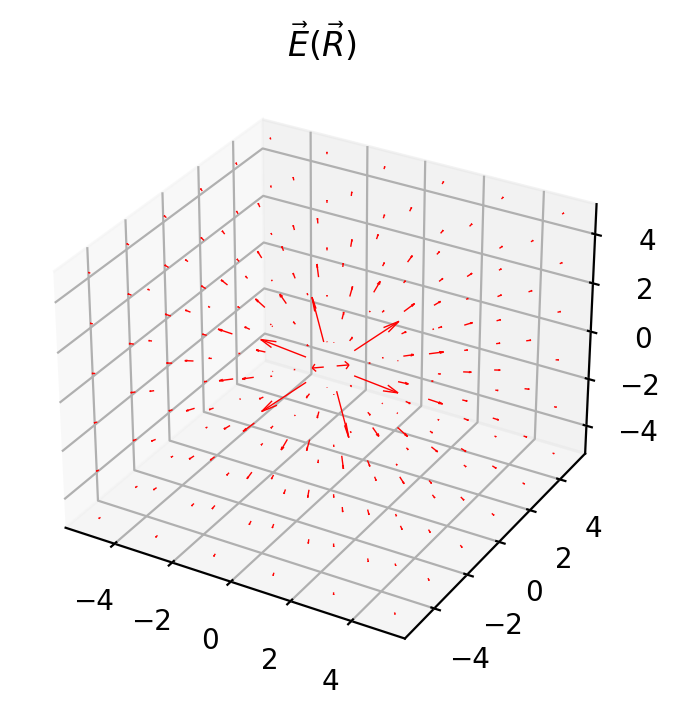

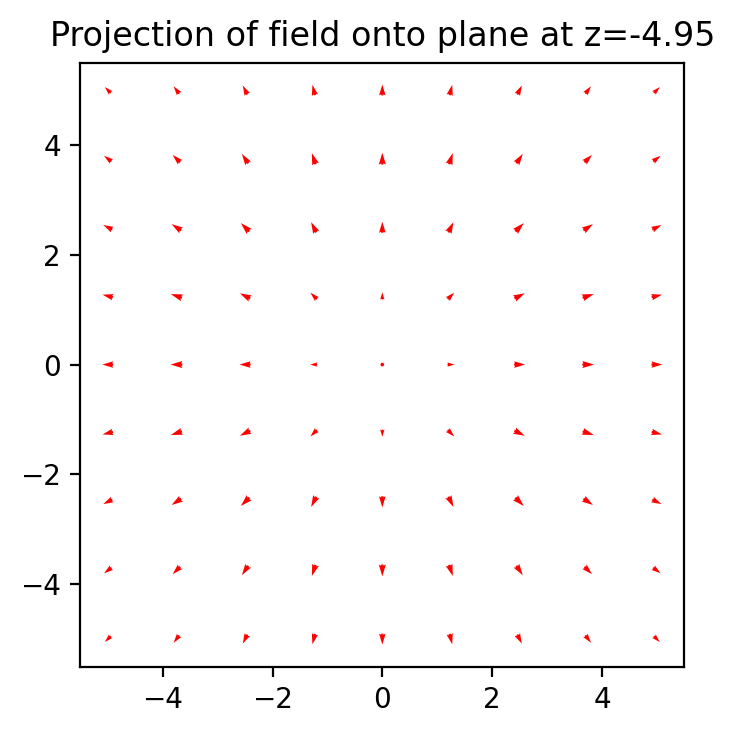

In [9]:
# Create a quiver plot.
# Use a coarser grid.
stride = 40
x = X[::stride,::stride,::stride].copy()
y = Y[::stride,::stride,::stride].copy()
z = Z[::stride,::stride,::stride].copy()
ex = Ex[::stride,::stride,::stride].copy()
ey = Ey[::stride,::stride,::stride].copy()
ez = Ez[::stride,::stride,::stride].copy()

# Set max length to improve visibility in plot.
ecut = 50
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ez[ez>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut
ez[ez<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=5, linewidth=0.5, color='red')
ax.set_title(r"$\vec{E}(\vec{R})$")

# Make a 2D plot of a slice of the field.
z0 = -200
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 25
x = X[::stride,::stride,z0].copy()
y = Y[::stride,::stride,z0].copy()
ex = Ex[::stride,::stride,z0].copy()
ey = Ey[::stride,::stride,z0].copy()

# Set max length to improve visibility in plot.
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.quiver(x,y,ex,ey, pivot='middle', scale=0.8, linewidth=0.5, color='red')
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

Change the values of `ecut` and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This representation shows the direction and strength of the field. as you move from the bottom through the middle to the top of the field the strength is represented as arrow length, and the arrow is the direction. This shows how the fields shape and direction change depending on the location on the Z axis. 
This does not show the related Positive and negative charges, and simply shows stregth. If the polarity was repreesented the one part of the field would have arrows pointing outwards, while the other inwards. Yhis does not appear to be present, and is a limitation. 

### 6. Streamlines of the Electric Field

The cell below will draw three dimensional "field lines" of the electric field.

(-5.0, 5.0, -5.0, 5.0)

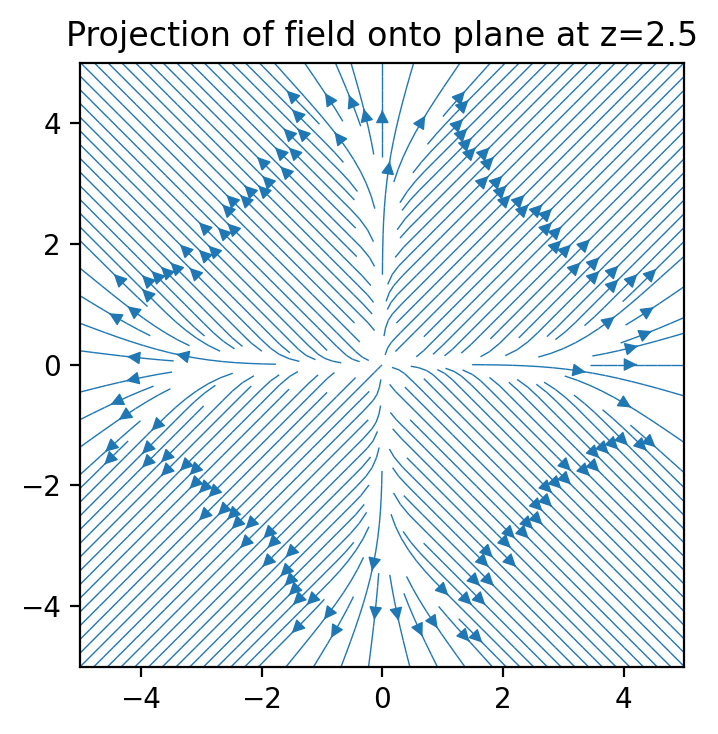

In [10]:
# Make a 2D plot of a slice of the field.
z0 = 150
z_val = Z[0,0,z0]

# Use a coarser grid.
stride = 1
x = X[::stride,::stride,z0].copy().T
y = Y[::stride,::stride,z0].copy().T
ex = Ex[::stride,::stride,z0].copy().T
ey = Ey[::stride,::stride,z0].copy().T

# Set max length to improve visibility in plot.
ecut = 0.01
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.streamplot(x,y,ex,ey, linewidth=0.5, density=1.5)
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

Change the values of `ecut` and `z0` in the cell above and run it again.  Do this several times.

What does this representation of the electric field reveal?  What information does it provide?  What are its limitations?

***Type your response in the box below.***

This shows the 3D shape of the electric field. It can be seen that the lines are not completely straight, as i dont think there should be many, if any straight lines in an electric field given enough granularity for analysis. That is, outside of a 2D analysis. This representation is still limited as it does not show more than a single slice of the field, and not a full 3D analysis. 

## Reflection

All of these plots are representations of the same underlying physical entity: the electromagnetic field of a single point charge.  Which did you find most useful?  Confusing?  Can you think of another way to represent a three-dimensional electric field or scalar field?

***Type your response in the box below.***

I found the quiver plots to be the most useful, while i found all of the 2D plots and especilly the streamlines confusing. The 1D plots made a little more sense, but only after some time spent analyzing what i was looking at. I think one way to view an electric field is like a big donut that got so big the center hole is mostly gone. The 2 holes represent the poles. 